## Note: All plots should meet the basic requirements of scientific plotting. For example, having title, x-axis, y-axis, legend... Interpretation of plots can get full points as long as they make sense.

## Q0: import the dataset to a pandas dataframe

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import math
from statsmodels.graphics.gofplots import qqplot_2samples
df = pd.read_csv('movie_metadata.csv')

## Q1. Histogram.
### Plot the histogram of movie durations. Note: plot only movies with a duration of less than or equal to 240 minutes. Use a bin size of 30.

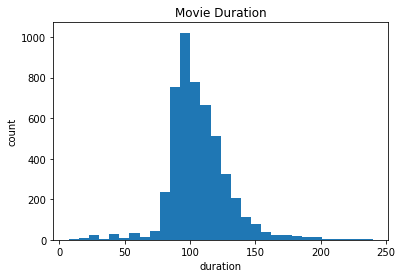

In [2]:
plt.title('Duration of Movie')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.hist(df[df['duration']<=240]['duration'], bins=30)
plt.showdata()

## Q2. Side-by-side box plot.
### Generate a side-by-side box plot to show the distribution of the number of critic reviews on four rating categories: PG-13, PG, G, and R. What insights can you get from the plot?

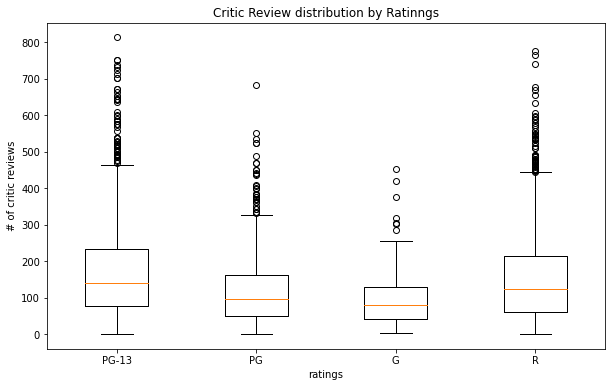

In [3]:


# create data set     df[df['vote_count']<2000]['vote_count']
data_to_plot = [df[df['content_rating'] == 'PG-13']['crit_review_numb'].dropna(), df[df['content_rating'] == 'PG']['crit_review_numb'].dropna(),
                df[df['content_rating'] == 'G']['crit_review_numb'].dropna(), df[df['content_rating'] == 'R']['crit_review_numb'].dropna()]

# Positions defaults to range(1, N+1) where N is the number of boxplot to be drawn.
# we will move them a little, to visually group them
plt.figure(figsize=(10, 6))
plt.title('Critic Reviews by Ratings')
plt.xlabel('Rating Score')
plt.ylabel('Amount of Critic Reviews')
box = plt.boxplot(data_to_plot,
                  labels=['PG-13','PG','G','R'])
plt.show()
# df['content_rating'] = pd.to_numeric(df['content_rating'], errors='coerce')

In [4]:
insights = ' For every parental rating (with the exception of G), there is a more than a few number of outliers. \n The median number of critic reviews is somewhere between 100-200. \n PG-13 and R rated movies have more critic reviews on average than movies that d.'
print('Insights:\t', insights)

Insights:	 For every parental rating excluding G, there is a generous number of outliers. 
 The median number of critic review is somewhere between 100 and 200. 
 PG-13 and R rated movies have more critic reviews on average than movies with other parental ratings.


## Q3. QQ plot.
### We want to specifically compare the distribution of the number of critic reviews on two rating categories: R and PG-13. Generate a QQ plot and make comparisons on the two distributions from the plot. What insights can you get from the plot?

/Users/nelly/opt/miniconda3/envs/NUCS396/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


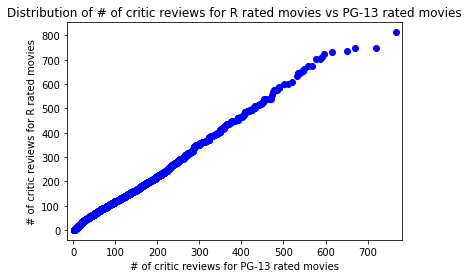

In [5]:
r_critic = df[df['content_rating'] == 'R']['crit_review_numb'].dropna()
pg13_critic = df[df['content_rating'] == 'PG-13']['crit_review_numb'].dropna()
qqplot_2samples(r_critic, pg13_critic, xlabel="Critic Review Amount for R rated movies", ylabel="Critic Review Amount for PG-13 rated movies")
plt.title('Critic Review Distribution for R rated movies vs PG-13 rated movies')
plt.show()

In [6]:
insights = 'Seems that both R and PG-13 rated movies have the same distribution concerning critic review amounts'
print('Insights:\t', insights)

Insights:	 Seems that both R and PG-13 rated movies have the same distribution concerning critic review amounts


## Q4. Scatter plot.
### Now we pay our attention to movies that are rated as 'G'.  Generate a scatter plot on the number of critic reviews and the number of user reviews. Use colors to show the IMDb scores. What insights can you get from the plot?


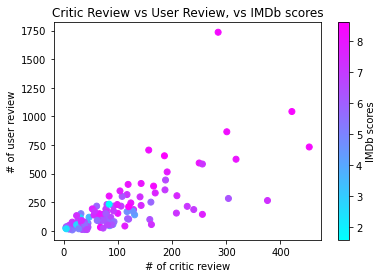

In [7]:
##TODO
critic = df[df['content_rating'] == 'G']['crit_review_numb']
user = df[df['content_rating'] == 'G']['num_user_reviews']
imdb = df[df['content_rating'] == 'G']['imdb_score']
plt.title('Critic Reviews vs User Reviews vs IMDb scores')
plt.xlabel('Critic Review Amount')
plt.ylabel('User Review Amount')
plt.scatter(critic, user, c=imdb, cmap=plt.cm.cool)
plt.colorbar().set_label('IMDb scores') #, rotation=270)
plt.show()

In [8]:
insights = 'Theres a slight correlation between number of critic reviews and number of user reviews. \n Movies with a low IMDb score usually have a low amount of reviews compared to movies with high IMDb scores.'
print('Insights:\t', insights)

Insights:	 Theres a slight correlation between number of critic reviews and number of user reviews. 
 Movies with a low IMDb score usually have a low amount of reviews compared to movies with high IMDb scores.


## Q5. Star plot.
### We want to compare the number of Facebook likes for the following eight countries: Australia, Canada, France, Germany, India, Spain, UK, and USA. 
### Specifically, we want to draw three curves, each representing one of the following values for all countries: mean of movie_facebook_likes,mean of actor_1_facebook_likes, mean of director_facebook_likes
### Generate a star plot that shows the above information. Each of the equiangular spokes should represent one country.

Hint1: Read https://www.kite.com/python/examples/5561/matplotlib-plot-a-polar-plot 

Hint2: the theta value is in the radian unit, so you might find https://docs.python.org/3/library/math.html#math.radians  useful.

/var/folders/9k/ty9cn19x6bnfvwsyy3f7n6280000gn/T/ipykernel_3132/2092507518.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["UK", "USA", "Australia", "Canada", "France", "Germany", "India", "Spain"])


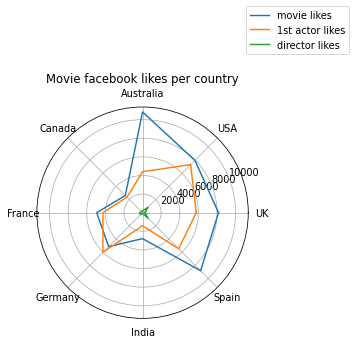

In [9]:
# Australia, Canada, France, Germany, India, Spain, UK,  and USA
aus_movie_likes = df[df['country'] == 'Australia']['movie_fb_likes'].mean().mean()
aus_actor_likes = df[df['country'] == 'Australia']['actor_1_fb_likes'].mean()
aus_director_likes = df[df['country'] == 'Australia']['director_fb_likes'].mean()

can_movie_likes = df[df['country'] == 'Canada']['movie_fb_likes'].mean()
can_actor_likes = df[df['country'] == 'Canada']['actor_fb_likes'].mean()
can_director_likes = df[df['country'] == 'Canada']['director_fb_likes'].mean()

fra_movie_likes = df[df['country'] == 'France']['movie_fb_likes'].mean()
fra_actor_likes = df[df['country'] == 'France']['actor_fb_likes'].mean()
fra_director_likes = df[df['country'] == 'France']['director_fb_likes'].mean()

ger_movie_likes = df[df['country'] == 'Germany']['movie_fb_likes'].mean()
ger_actor_likes = df[df['country'] == 'Germany']['actor_fb_likes'].mean()
ger_director_likes = df[df['country'] == 'Germany']['director_fb_likes'].mean()

ind_movie_likes = df[df['country'] == 'India']['movie_fb_likes'].mean()
ind_actor_likes = df[df['country'] == 'India']['actor_fb_likes'].mean()
ind_director_likes = df[df['country'] == 'India']['director_fb_likes'].mean()

spa_movie_likes = df[df['country'] == 'Spain']['movie_fb_likes'].mean()
spa_actor_likes = df[df['country'] == 'Spain']['actor_fb_likes'].mean()
spa_director_likes = df[df['country'] == 'Spain']['director_fb_likes'].mean()

uk_movie_likes = df[df['country'] == 'UK']['movie_fb_likes'].mean()
uk_actor_likes = df[df['country'] == 'UK']['actor_fb_likes'].mean()
uk_director_likes = df[df['country'] == 'UK']['director_fb_likes'].mean()

usa_movie_likes = df[df['country'] == 'USA']['movie_fb_likes'].mean()
usa_actor_likes = df[df['country'] == 'USA']['actor_fb_likes'].mean()
usa_director_likes = df[df['country'] == 'USA']['director_fb_likes'].mean()

w = 4
h = 4
d = 70
plt.figure(figsize=(w, h), dpi=d)
movie_r = [uk_movie_likes, usa_movie_likes, aus_movie_likes, can_movie_likes, fra_movie_likes, ger_movie_likes, ind_movie_likes, spa_movie_likes, uk_movie_likes]
actor_r = [uk_actor_likes, usa_actor_likes, aus_actor_likes, can_actor_likes, fra_actor_likes, ger_actor_likes, ind_actor_likes, spa_actor_likes, uk_actor_likes]
director_r = [uk_director_likes, usa_director_likes, aus_director_likes, can_director_likes, fra_director_likes, ger_director_likes, ind_director_likes, spa_director_likes, uk_director_likes]
theta = np.arange(0,2.125*np.pi,np.pi/4.0)
ax = plt.subplot(111, projection='polar')
# movie_theta = [5, 5, 5, 5,  5, 5, 5, 5]

# theta = [0, 1, 2.5]
# r = [0, 0.1, 0.2]
ax.plot(theta, movie_r, label="movie likes")
ax.plot(theta, actor_r, label="1st actor likes")
ax.plot(theta, director_r, label="director likes")
ax.legend(loc='upper right', bbox_to_anchor=(1.5, 1.5))
ax.set_xticklabels(["UK", "USA", "Australia", "Canada", "France", "Germany", "India", "Spain"])
plt.title("Movie facebook likes per country")

plt.show()


In [10]:
##TODO 
insights = 'Movies, actors, and directors with high amounts of likes on Facebook tend to come from the countries/continents of Australia, Spain, USA, and the UK.'
print('Insights:\t', insights)




Insights:	 Movies, actors, and directors with high amounts of likes on Facebook tend to come from the countries/continents of Australia, Spain, USA, and the UK. 
